In [37]:
import matplotlib
import pandas as pd
from common.outliers import find_outliers_in_multiple_columns, plot_2d_data_with_outliers
from common.standardization import standardize, de_standardize

matplotlib.rcParams['figure.figsize'] = [7, 7]

### Constants and settings

In [38]:
columns_used_for_clustering = ["User_Score", "Critic_Score", "EU_Sales", "NA_Sales", "JP_Sales", "Year_of_Release"]

### Load dataset from file
Please note that the `_preprocessed` file is required. To use this notebook
properly, please execute the preprocessing one first to generate proper dataset
file.

In [39]:
data = pd.read_excel("../data/games_sales_2016_preprocessed.xlsx", index_col=0)
data = data.filter(items=columns_used_for_clustering)

### Data stats for each column

In [40]:
stats_to_compute = ["max", "min", "std", "mean", "median"]
columns_stats = data.agg({item: stats_to_compute for item in columns_used_for_clustering})
print(columns_stats.to_string())

          User_Score  Critic_Score   EU_Sales   NA_Sales   JP_Sales  Year_of_Release
max     9.600000e+00     99.000000  28.960000  41.360000  10.220000      2016.000000
min     8.881784e-16     13.000000   0.000000   0.000000   0.000000      1977.000000
std     1.302502e+00     12.449705   0.622661   1.002670   0.385861         6.070377
mean    7.270068e+00     70.941734   0.225307   0.402908   0.108312      2006.003636
median  7.500000e+00     72.400000   0.070000   0.170000   0.000000      2007.000000


### Data standardization

In [41]:
standardize(data, columns_used_for_clustering, columns_stats)

### Outliers detection

C:\GitRepos\Data-Mining-Project\common\standardization.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column] = dataframe[column] * data_stats[column]["std"] + data_stats[column]["mean"]
C:\Users\Jarek\.conda\envs\EksploracjaDanych\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Jarek\.conda\envs\EksploracjaDanych\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

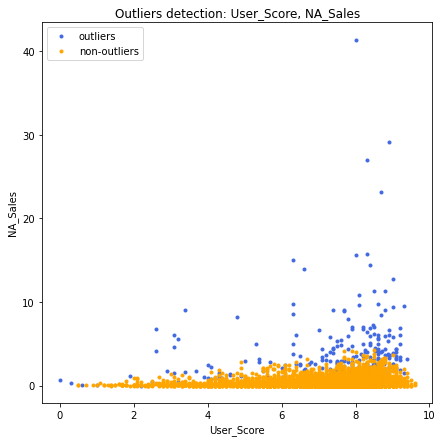

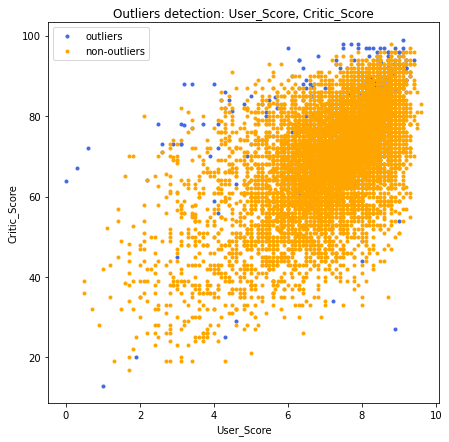

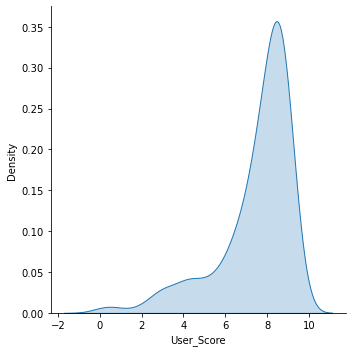

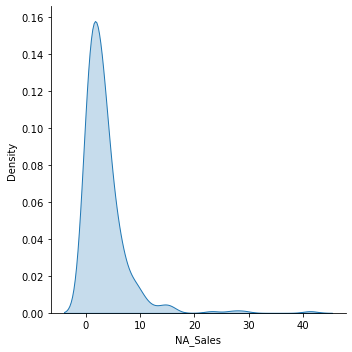

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_2d_data_with_outliers(outliers, non_outliers, column_pair):
    plot_data_with_outliers(outliers[column_pair[0]], outliers[column_pair[1]],
                            non_outliers[column_pair[0]], non_outliers[column_pair[1]], column_pair)
    plt.show()

def plot_data_with_outliers(outliers_x, outliers_y, non_outliers_x, non_outliers_y, column_names):
    plt.figure()
    plt.plot(outliers_x, outliers_y, 'o', c='royalblue', label="outliers", ms=3)
    plt.plot(non_outliers_x, non_outliers_y, 'o', c='orange', label="non-outliers", ms=3)
    plt.xlabel(column_names[0])
    plt.ylabel(column_names[1])
    plt.legend()
    plt.title("Outliers detection: {}, {}".format(column_names[0], column_names[1]))

k_neighbours = 5
r_percentage = 0.03
outliers, non_outliers = find_outliers_in_multiple_columns(data, columns_used_for_clustering, k_neighbours, r_percentage)

de_standardize(outliers, columns_used_for_clustering, columns_stats)
de_standardize(non_outliers, columns_used_for_clustering, columns_stats)

plot_2d_data_with_outliers(outliers, non_outliers, ("User_Score", "NA_Sales"))
plot_2d_data_with_outliers(outliers, non_outliers, ("User_Score", "Critic_Score"))

outliers["outliers"] = "outlier"
non_outliers["outliers"] = "normal"
result = pd.concat([outliers, non_outliers])

# sns.pairplot(data=result, hue="outliers", markers=['o', 'o'])
sns.displot(outliers, x="User_Score", kind="kde", fill=True)
sns.displot(outliers, x="NA_Sales", kind="kde", fill=True)